<a href="https://colab.research.google.com/github/hussain0048/Projects-/blob/master/Image_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In the realm of machine learning and computer vision, the quality of your model's output heavily relies on the quality of the input data. Image data preprocessing is a crucial step that can significantly influence the performance of your model.
When given a dataset, the preprocessing can have various steps depending on
a) what type of data you're looking at (text, images, time series, ...)
b) what models you want to train

This blog will walk you through the essentials of image data preprocessing in Python, using popular libraries like OpenCV, PIL, and TensorFlow.

# **Table of Content**



1.   What is image Preprocessing
2.   Tools and Libraries
3.   Image Preprocessing steps



# **What is image preprocessing?**

**What is preprocessing?**

Def: Preprocessing describes the process of cleaning and converting a 'raw' (i.e. unprocessed) dataset into a clean dataset.

Def: Image preprocessing is the process of manipulating raw image data into a usable and meaningful format. It allows you to eliminate unwanted distortions and enhance specific qualities essential for computer vision applications.

**Why Image Data Preprocessing?**

Before feeding images into a machine learning model, preprocessing is necessary for several reasons:

1- Normalization: Ensures that pixel values are within a specific range.

2- Resizing: Standardizes the input size for uniformity.

3- Augmentation: Increases the diversity of the training data without actually collecting new data.

4- Noise Reduction: Removes unwanted artifacts that can distort the image.

# T**ools and Libraries**

Several libraries exist that make it easier to preprocess images. For example, you can use **scikit-image**, **OpenCV **or **Pillow**. Each library has different functionalities, pros and cons. In this notebook we will stick to scikit-image.

**Tools and Libraries**

Python offers several libraries to handle image data preprocessing:

1- **OpenCV:** A powerful library for computer vision tasks.

2- **PIL (Pillow):** A Python Imaging Library that adds image processing capabilities.

3- **TensorFlow:** An end-to-end open-source platform for machine learning that includes preprocessing utilities.

4-  **scikit-image** scikit-image is a collection of algorithms for image processing.

Let's dive into some common preprocessing steps using these libraries.

# **Image Data Preprocessing Steps**

As mentioned already, the preprocessing steps you will need for your dataset depend on the nature of the dataset and models you want to train. Possible preprocessing steps for images are:

## **Data Loading**

Getting images ready for use means taking them from wherever they're stored and bringing them into memory. You can do this with tools like PIL or OpenCV. This makes the images easier to work with and study.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import glob
import os
import random
import matplotlib
import warnings

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import img_as_float
from skimage.transform import resize, rotate
from skimage.color import rgb2gray

%matplotlib inline
warnings.simplefilter('ignore')

In [5]:
# Create a list of all images (replace with your actual Google Drive path)
root_path = '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images'
print("Root path:", root_path)
all_images = glob.glob(root_path + '/*.jpg')
print("All images:", all_images)

Root path: /content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images
All images: ['/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/yorkshire_terrier_168.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/boxer_49.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/yorkshire_terrier_123.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/saint_bernard_63.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/great_pyrenees_11.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/pug_153.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/Bombay_117.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/miniature_pinscher_5.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/boxer_167.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image Preprocessing/images/British_Shorthair_71.jpg', '/content/gdrive/MyDrive/Datasets (1)/Image

In [6]:

# To avoid memory errors we will only use a subset of the images
all_images = random.sample(all_images, 500)

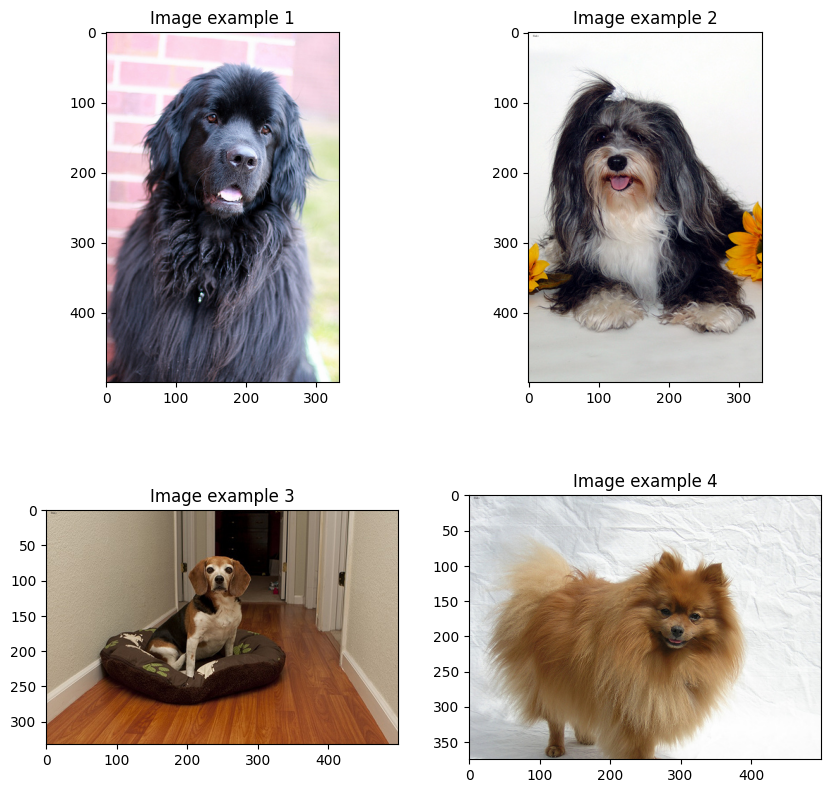

In [7]:
# Plot a few images
i = 0
fig = plt.figure(figsize=(10, 10))
for img_path in all_images[:4]:
    img_arr = io.imread(img_path)
    i += 1
    ax = fig.add_subplot(2, 2, i)
    ax.imshow(img_arr)
    ax.set_title(f"Image example {i}")

**Using OpenCV**

In [ ]:
import cv2

# Load an image using OpenCV
image = cv2.imread('path_to_image.jpg')


**Using PIL**

In [ ]:
from PIL import Image

# Load an image using PIL
image = Image.open('path_to_image.jpg')


## **Rescale the images**

Resizing images changes their dimensions (height and width) to a standard size, which is crucial for ensuring uniform input sizes for machine learning models.

This step is important because most neural networks require fixed input dimensions.

The images displayed above show us that the dataset has images with various scales. So, as a first preprocessing step, we will make sure that all images have the same height and width. When choosing an appropriate size we should keep in mind that bigger images correspond to higher computational requirements (both memory and operation wise).

As a first step we should figure out the dimensions of our images.

In [ ]:
all_sizes = [io.imread(img).shape for img in all_images]

heights = [img_shape[0] for img_shape in all_sizes]
widths = [img_shape[1] for img_shape in all_sizes]

print(f"Minimum image height: {min(heights)}")
print(f"Maximum image height: {max(heights)}")
print()
print(f"Minimum image width: {min(widths)}")
print(f"Maximum image width: {max(widths)}")

We will resize the images to
 pixels using scikit-image (other shapes would be fine, too). The images won't be cropped but up-sized or down-sized using interpolation.

Further, for simplicity, we will skip images that have less or more than 3 color channels (i.e. images whose mode is not RGB). As a quick reminder:

RGB is a 3-channel format corresponding to the channels red, green and blue. RGBA is a 4-channel format corresponding to red, green, blue and alpha. The alpha channel makes the color of the image transparant or translucent.

Note: make sure to create a folder named "resized_images", otherwise the code below will raise an error!

In [ ]:
resized_path = os.path.join(root_path, 'resized_images/')

for img_path in all_images:
    # Create a new image name to save the resized image
    img_name = img_path.split('/')[-1]
    img_name = os.path.splitext(img_name)
    resized_name = img_name[0] + '_resized' + img_name[1]
    save_path = os.path.join(resized_path, resized_name)

    img = io.imread(img_path)

    if img.ndim != 3 or img.shape[2] != 3:
        continue

    resized_img = resize(img, output_shape=(256, 256))
    io.imsave(save_path, resized_img)
all_images = glob.glob(resized_path + '/*')

In [ ]:
# Plot a few images
fig = plt.figure(figsize=(10, 10))

i = 0
for img_path in all_images[:4]:
    img_arr = io.imread(img_path)
    i += 1
    ax = fig.add_subplot(2, 2, i)
    ax.imshow(img_arr)
    ax.set_title(f"Resized image example {i}")

**Using OpenCV**

In [ ]:
# Resize the image to 224x224 pixels
resized_image = cv2.resize(image, (224, 224))


**Using PIL**

In [ ]:
# Resize the image to 224x224 pixels
resized_image = image.resize((224, 224))


## **Normalizing pixel values**

Basically, normalizing pixel values means adjusting the intensity of pixels in an image to a set range like [0, 1] or [-1, 1]. This is done by dividing the pixel values by the maximum possible value (e.g., 255 for an 8-bit image). Normalization is important for making machine learning models train faster and more effectively by keeping input features on a consistent scale. This helps with stability and overall performance.

Normalizing pixel values has two steps:

**Mean subtraction:** in the case of images this often refers to subtracting the mean computed over all images from each pixel. The mean value can be computed over all three channels or for each channel individually. As described in the given link this has the "geometric interpretation of centering the cloud of data around the origin along every dimension".

**Divide by standard deviation:** This step is not strictly necessary for images because the relative pixel scales are already approximately equal. Nevertheless, we will include this step for completeness.

In [ ]:
# To compute the mean and standard deviation over all images
# we need to combine them in one big array
big_list = []

for img_path in all_images:
    big_list.append(io.imread(img_path))

all_imgs = np.array(big_list)

# The image pixels are uint8. To compute a mean we
# convert the pixel values to floats
all_imgs_float = img_as_float(all_imgs)

# Mean subtraction
mean = np.mean(all_imgs_float, axis=0)
all_imgs_float -= mean

# Dividing by standard deviation
std = np.std(all_imgs_float, axis=0)
all_imgs_float /= std
fig = plt.figure(figsize=(12, 12))

for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(all_imgs_float[i])
    ax.set_title(f"Normalized image example {i+1}")

**Using OpenCV**

In [ ]:
# Normalize pixel values to [0, 1]
normalized_image = image / 255.0


## **Converting to grayscale**

Converting color images to grayscale can simplify your image data and reduce computational needs for some algorithms.

Converting the images to grayscale is very easy with scikit-image.



In [ ]:
gray_images = rgb2gray(all_imgs)

fig = plt.figure(figsize=(10, 10))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(gray_images[i], cmap='gray')
    ax.set_title(f"Grayscale image example {i+1}")

## **Data augmentation**

Image augmentation is a technique to artificially increase the size of a dataset by creating modified versions of images. Common augmentations include rotation, flipping, and zooming.

First of all: why do we need data augmentation?

The performance of a machine learning algorithm depends heavily on the amount and quality of the data it is trained with. In most cases, the more data a machine learning algorithm has access to, the more effective it can be. However, most of the time, we only have access to a small amount of data with sufficient quality. So, if we augment our dataset in a useful way we can improve the performance of our model without having to gather a larger dataset.

Furthermore, augmenting the dataset can make our model more robust. For example, consider the task of image classification. Let's say we want to classify the breed of dog/cat shown in each image of our dataset. Our training set will contain only a limited amount of images each breed, and each breed will be displayed in a limited set of conditions. However, our test set (or real world application) may contain images of dogs and cats in a large variety of conditions. The images could be taken from various angles, locations, lighting conditions, etc. By augmenting our training set with small variations of the original images, we can allow our model to account for such variations.

Images can be augmented in various ways, for example using:

1- rotation

2- translation

3- rescaling

4- lipping

5- stretching etc.

**scikit-image**

Most of these tasks can be performed easily with scikit-image or one of the other image processing libraries. Let's look at rotation as an example.

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i in range(4):
    random_angle = np.random.randint(low=0, high=360)
    rotated_image = rotate(all_imgs[i], angle=random_angle)
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(rotated_image)
    ax.set_title(f"Randomly rotated image example {i+1}")

**Using TensorFlow**

TensorFlow provides a high-level API for image augmentation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming 'image' is a numpy array of shape (height, width, channels)
image = image.reshape((1, ) + image.shape)  # Reshape image for the generator

# Generate batches of augmented images
for batch in datagen.flow(image, batch_size=1):
    augmented_image = batch[0]
    break  # To generate one augmented image


## **Noise Reduction**

Reducing noise can help improve the clarity of the image and the performance of the model.



Smoothing, blurring, and filtering techniques can be applied to remove unwanted noise from images. The GaussianBlur () and medianBlur () methods are commonly used for this.

**Using OpenCV**


In [ ]:
# Apply GaussianBlur to reduce noise
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)


# **Conclusion**

Conclusion
Effective image data preprocessing is a critical step in building robust and high-performing machine learning models. By leveraging libraries such as OpenCV, PIL, and TensorFlow, you can streamline this process and ensure your images are in the best possible shape for model training. Whether it's resizing, normalizing, augmenting, or reducing noise, each step enhances the quality of your input data and, consequently, the performance of your model.

# **References**

[1- Image Preprocessing](https://github.com/zotroneneis/machine_learning_basics/blob/master/image_preprocessing.ipynb)

[2-Image Data Preprocessing Techniques You Should Know](https://thecleverprogrammer.com/2024/06/05/image-data-preprocessing-techniques-you-should-know/?fbclid=IwZXh0bgNhZW0CMTEAAR2Qfq3em9lQDc4msZcLMmimg9nPX-RvBKMZPVNg40Tn_q5e1UK9kHfOl18_aem_ZmFrZWR1bW15MTZieXRlcw)

[3-Why normalize images by subtracting dataset's image mean, instead of the current image mean in deep learning?](https://stats.stackexchange.com/questions/211436/why-normalize-images-by-subtracting-datasets-image-mean-instead-of-the-current)

[4-The Complete Guide to Image Preprocessing Techniques in Python](https://medium.com/@maahip1304/the-complete-guide-to-image-preprocessing-techniques-in-python-dca30804550c)